# Rho+ Showcase

Rho+ is a library to make creating beautiful, cohesive plots using multiple Python data science tools (`matplotlib`, `seaborn`, `plotly`, `bokeh`, and `altair`) easier. It includes a couple different kinds of improvements:

 - A pair of light and dark themes that cohere with each other and can be used to ensure consistent appearance across Python data visualization tools.
 - A set of custom colormaps, easy to use in multiple separate libraries, that are designed to work in both light and dark mode.
 - Several small ergonomic enhancements to plotting functionality that achieve complicated effects without requiring custom code or tweaking.

Let's see it in action!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import rho_plus as rho

To show what Rho+ can do, let's make a complicated four-figure plot in Matplotlib.

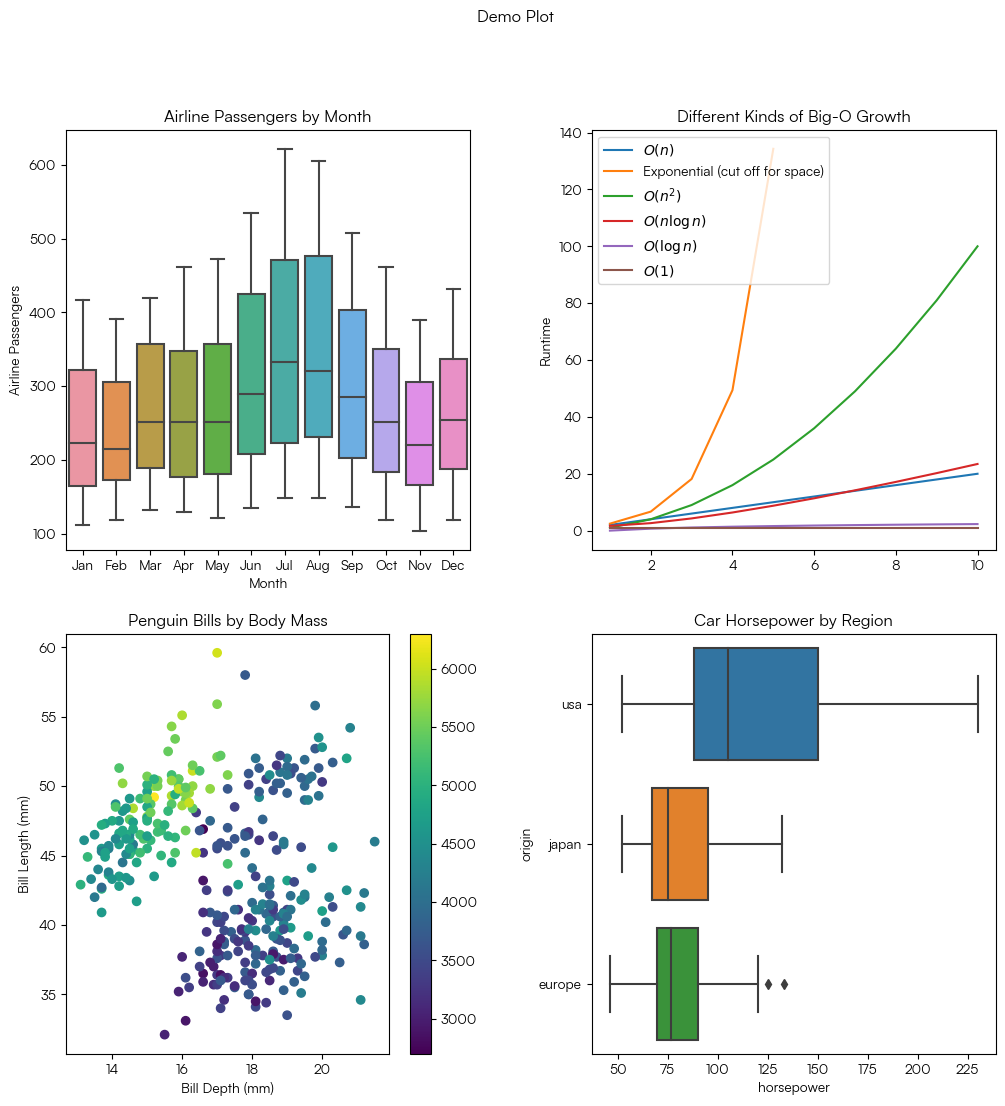

In [2]:
def test_plot(use_rho=False, is_dark=False):
    if use_rho:
        # Use Rho+ styling
        rho.mpl_setup(is_dark, setup=True)
    else:
        # use defaults
        plt.rcdefaults()

    # Rho+ doesn't pick a font for you: use whatever you like/have installed
    plt.rcParams['font.sans-serif'] = ['Satoshi']

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12), gridspec_kw=dict(wspace=0.3))

    fig.suptitle('Demo Plot')

    flights = sns.load_dataset('flights')

    sns.boxplot(
        data=flights,
        x='month',
        y='passengers',
        ax=ax1,
        # use Rho+ box plot styling
        **(rho.boxstyle() if use_rho else {})
    )
    ax1.set_title('Airline Passengers by Month')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Airline Passengers')

    if use_rho:
        # move the y-axis label to the top and make it horizontal
        rho.ylabel_top(ax1)

        # make the axes end at the limits of the plot, and show those as ticks
        rho.smart_ticks(ax1)

    xx = np.arange(10) + 1
    ax2.plot(xx, 2 * xx, label='$O(n)$')
    ax2.plot(xx[:5], np.exp(xx[:5] - 0.1), label='Exponential (cut off for space)')
    ax2.plot(xx, xx ** 2, label='$O(n^2)$')
    ax2.plot(xx, xx * np.log(xx) + 5 / (xx + 2), label=r'$O(n \log n)$')
    ax2.plot(xx, np.log(xx), label=r'$O(\log n)$')
    ax2.plot(xx, xx * 0 + 1, label=r'$O(1)$')
    ax2.legend()
    ax2.set_ylabel('Runtime', wrap=True)
    ax2.set_title('Different Kinds of Big-O Growth')

    if use_rho:
        # move the y-axis label to the top and make it horizontal
        rho.ylabel_top(ax2)

        # make the axes end at the limits of the plot, and show those as ticks
        rho.smart_ticks(ax2)

        # add the labels to the ends of the line chart instead of a legend
        rho.line_labels(ax2)

    penguins = sns.load_dataset('penguins')
    im = ax3.scatter(
        data=penguins,
        c='body_mass_g',
        x='bill_depth_mm',
        y='bill_length_mm',    
        ec='face',
        # use Rho+ version of viridis
        # this isn't quite as light of a yellow, so it shows up better on a white background
        cmap='rho_viridia' if use_rho else 'viridis'
    )                
    ax3.set_title('Penguin Bills by Body Mass')
    ax3.set_xlabel('Bill Depth (mm)')
    ax3.set_ylabel('Bill Length (mm)')
    fig.colorbar(im, ax=ax3)

    if use_rho:
        # move the y-axis label to the top and make it horizontal
        rho.ylabel_top(ax3)

    mpg = sns.load_dataset('mpg')
    sns.boxplot(
        data=mpg, 
        y='origin', 
        x='horsepower', 
        orient='h', 
        ax=ax4,
        # use Rho box styling
        **(rho.boxstyle() if use_rho else {})
    )

    if use_rho:
        # switch to alternate unfilled boxplot
        rho.unfill_boxplot(ax4)

        # move the y-axis label to the top and make it horizontal
        rho.ylabel_top(ax4);

    ax4.set_title('Car Horsepower by Region')

test_plot()

Now let's see the Rho+ version. Without changing any of your plotting code, the Rho+ theme setup gives you:

 - A categorical color palette of 12 colors that have been extensively tuned to ensure usability and aesthetic appeal
 - An uncluttered default theme that matches with the Rho+ themes for other plotting libraries
 - A paired dark theme that keeps the same color palette to use at your leisure

By adding a couple function calls and tweaking a couple lines of code, Rho+ can also give you:

 - Access to a set of sequential colormaps that are optimized for both light and dark mode
 - A custom box plot theme, in both filled and unfilled versions
 - Replacing legends in line plots with annotations
 - Y-axis labels oriented the way most English text is, set at the top
 - Axis limits that show the min and max of the data

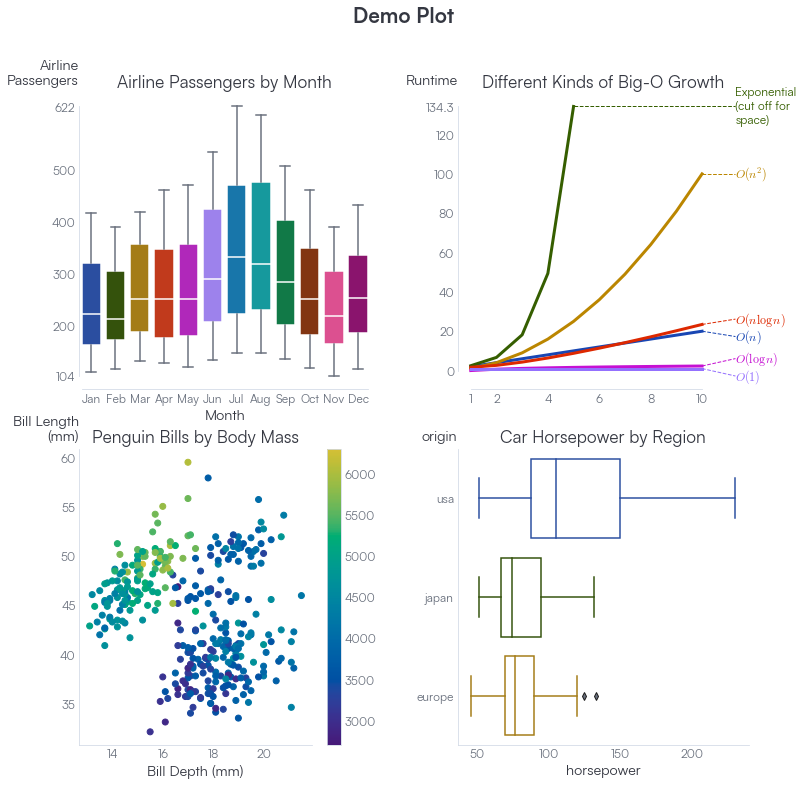

In [3]:
test_plot(use_rho=True)

Changing one line shows what the paired dark theme looks like:

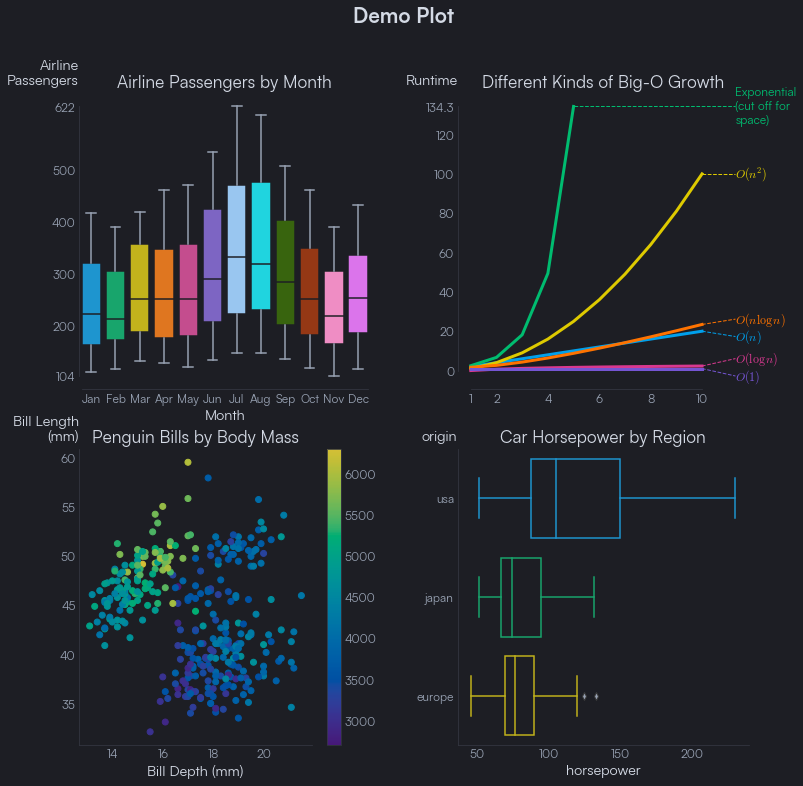

In [4]:
test_plot(use_rho=True, is_dark=True)

This is all you need to get started using Rho+! The `test_plot` function shows the main Python functionality.

For more information on the available color palettes, consult that documentation. If you have improvements to suggest, or things don't work as you expect them to, feel free to file a pull request. Happy graphing!